In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

import os

In [119]:
JHC1= pd.read_csv("Dataset_for_variable_selection_1JHC.csv")

In [35]:
#JHN1= pd.read_csv("Dataset_for_variable_selection_1JHN.csv")
#JHC2= pd.read_csv("Dataset_for_variable_selection_2JHC.csv")
#JHH2= pd.read_csv("Dataset_for_variable_selection_2JHH.csv")
#JHN2= pd.read_csv("Dataset_for_variable_selection_2JHN.csv")
#JHC3= pd.read_csv("Dataset_for_variable_selection_3JHC.csv")
#JHH3= pd.read_csv("Dataset_for_variable_selection_3JHH.csv")
#JHN3= pd.read_csv("Dataset_for_variable_selection_3JHN.csv")

In [132]:
#pd.get_option("display.max_columns")
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 600)

In [3]:
def reduce_mem_usage(df, verbose=True):
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    start_mem = df.memory_usage().sum() / 1024**2
    for col in df.columns:
        col_type = df[col].dtypes
        if col_type in numerics:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)

    end_mem = df.memory_usage().sum() / 1024**2
    if verbose:
        print('Mem. usage decreased to {:5.2f} Mb ({:.1f}% reduction)'.format(end_mem, 100 * (start_mem - end_mem) / start_mem))
    return df

In [121]:
JHC1.head(5)

,id,molecule_name,atom_index_0,atom_index_1,type,scalar_coupling_constant,atom_0,x_0,y_0,z_0,dist_C_0_x,dist_C_1_x,dist_C_2_x,dist_C_3_x,dist_C_4_x,dist_F_0_x,dist_F_1_x,dist_F_2_x,dist_F_3_x,dist_F_4_x,dist_H_0_x,dist_H_1_x,dist_H_2_x,dist_H_3_x,dist_H_4_x,dist_N_0_x,dist_N_1_x,dist_N_2_x,dist_N_3_x,dist_N_4_x,dist_O_0_x,dist_O_1_x,dist_O_2_x,dist_O_3_x,dist_O_4_x,atom_1,x_1,y_1,z_1,dist_C_0_y,dist_C_1_y,dist_C_2_y,dist_C_3_y,dist_C_4_y,dist_F_0_y,dist_F_1_y,dist_F_2_y,dist_F_3_y,dist_F_4_y,dist_H_0_y,dist_H_1_y,dist_H_2_y,dist_H_3_y,dist_H_4_y,dist_N_0_y,dist_N_1_y,dist_N_2_y,dist_N_3_y,dist_N_4_y,dist_O_0_y,dist_O_1_y,dist_O_2_y,dist_O_3_y,dist_O_4_y,c_x,c_y,c_z,rc_A,rc_B,rc_C,mu,alpha,homo,lumo,gap,r2,zpve,U0,U,H,G,Cv,freqs_min,freqs_max,freqs_mean,mulliken_min,mulliken_max,mulliken_mean,mulliken_atom_0,mulliken_atom_1,type_1JHN,type_2JHC,type_2JHH,type_2JHN,type_3JHC,type_3JHH,type_3JHN,atom_1_H,atom_1_N,dist,...,NumAliphaticHeterocycles,NumAliphaticRings,NumAromaticCarbocycles,NumAromaticHeterocycles,NumAromaticRings,NumHAcceptors,NumHDonors,NumHeteroatoms,NumRotatableBonds,NumSaturatedCarbocycles,NumSaturatedHeterocycles,NumSaturatedRings,RingCount,MolLogP,MolMR,fr_Al_COO,fr_Al_OH,fr_Al_OH_noTert,fr_ArN,fr_Ar_COO,fr_Ar_N,fr_Ar_NH,fr_Ar_OH,fr_COO,fr_COO2,fr_C_O,fr_C_O_noCOO,fr_C_S,fr_HOCCN,fr_Imine,fr_NH0,fr_NH1,fr_NH2,fr_N_O,fr_Ndealkylation1,fr_Ndealkylation2,fr_Nhpyrrole,fr_SH,fr_aldehyde,fr_alkyl_carbamate,fr_alkyl_halide,fr_allylic_oxid,fr_amide,fr_amidine,fr_aniline,fr_aryl_methyl,fr_azide,fr_azo,fr_barbitur,fr_benzene,fr_benzodiazepine,fr_bicyclic,fr_diazo,fr_dihydropyridine,fr_epoxide,fr_ester,fr_ether,fr_furan,fr_guanido,fr_halogen,fr_hdrzine,fr_hdrzone,fr_imidazole,fr_imide,fr_isocyan,fr_isothiocyan,fr_ketone,fr_ketone_Topliss,fr_lactam,fr_lactone,fr_methoxy,fr_morpholine,fr_nitrile,fr_nitro,fr_nitro_arom,fr_nitro_arom_nonortho,fr_nitroso,fr_oxazole,fr_oxime,fr_para_hydroxylation,fr_phenol,fr_phenol_noOrthoHbond,fr_phos_acid,fr_phos_ester,fr_piperdine,fr_piperzine,fr_priamide,fr_prisulfonamd,fr_pyridine,fr_quatN,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,0,dsgdb9nsd_000001,1,0,1JHC,84.8,H,0.00215,-0.00603,0.001976,1.614,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0759,0.0759,0.07587,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C,-0.012695,1.086,0.00800,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.7437,0.7437,0.7437,0.7437,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.01269,1.0860,0.00800,157.7118,157.8,157.8,0.000,13.21,-0.3877,0.1171,0.5050,35.38,0.04474,-40.47,-40.47,-40.47,-40.50,6.470,1341.0,3152.0,2182.0,-0.5356,0.1339,0.000000e+00,0.1339,-0.53560,0,0,0,0,0,0,0,0,0,1.092,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0.6360,6.73,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,4,dsgdb9nsd_000001,2,0,1JHC,84.8,H,1.01200,1.46400,0.000277,1.614,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0759,0.0759,0.07587,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C,-0.012695,1.086,0.00800,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.7437,0.7437,0.7437,0.7437,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.01269,1.0860,0.00800,157.7118,157.8,157.8,0.000,13.21,-0.3877,0.1171,0.5050,35.38,0.04474,-40.47,-40.47,-40.47,-40.50,6.470,1341.0,3152.0,2182.0,-0.5356,0.1339,0.000000e+00,0.1339,-0.53560,0,0,0,0,0,0,0,0,0,1.092,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0.6360,6.73,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,7,dsgdb9nsd_000001,3,0,1JHC,84.8,H,-0.54100,1.44700,-0.876500,1.614,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0759,0.0759,0.07587,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C,-0.012695,1.086,0.00800,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.7437,0.7437,0.7437,0.7437,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.01269,1.08

In [122]:
JHC1.shape

(709416, 572)

In [123]:
y_train = JHC1["scalar_coupling_constant"]
type_name =JHC1["type"]
JHC1=JHC1.drop(["scalar_coupling_constant", "type"], axis=1)

In [74]:
JHC1.head(5)

,id,molecule_name,atom_index_0,atom_index_1,atom_0,x_0,y_0,z_0,dist_C_0_x,dist_C_1_x,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,0,dsgdb9nsd_000001,1,0,H,0.00215,-0.00603,0.001976,1.614,NaN,...,0,0,0,0,0,0,0,0,0,0
1,4,dsgdb9nsd_000001,2,0,H,1.01200,1.46400,0.000277,1.614,NaN,...,0,0,0,0,0,0,0,0,0,0
2,7,dsgdb9nsd_000001,3,0,H,-0.54100,1.44700,-0.876500,1.614,NaN,...,0,0,0,0,0,0,0,0,0,0
3,9,dsgdb9nsd_000001,4,0,H,-0.52400,1.43750,0.906200,1.614,NaN,...,0,0,0,0,0,0,0,0,0,0
4,17,dsgdb9nsd_000005,2,0,H,-0.02780,2.20000,0.014150,2.150,NaN,...,0,0,0,0,0,0,0,0,0,0


In [124]:
#drop label data
JHC1=JHC1.drop(['molecule_name', 'id' , 'atom_0','atom_1' ], axis=1) #type is need for lightGBM, so don't drop here

In [125]:
#blocking
JHC1 =JHC1.drop(["102", "107","134","112", "117","119","122", "148","124","130", "143","162", "76",
                 "NumAromaticHeterocycles","NumAromaticRings","NumHAcceptors","NumHeteroatoms", "NumHDonors",
                 "NumSaturatedCarbocycles","NumSaturatedHeterocycles", "NumSaturatedRings","RingCount","fr_COO", 
                 "fr_COO2","fr_C_O_noCOO","fr_NH2", "fr_Nhpyrrole","NumAromaticCarbocycles","fr_nitrile", 
                 "fr_nitro","fr_nitro_arom_nonortho","fr_oxime", "fr_phenol_noOrthoHbond"] , axis=1)

In [ ]:
#JHN1=JHN1.drop(['id' , 'type'], axis=1)
#JHC2=JHC2.drop(['id' , 'type'], axis=1)
#JHH2=JHH2.drop(['id' , 'type'], axis=1)
#JHN2=JHN2.drop(['id' , 'type'], axis=1)
#JHC3=JHC3.drop(['id' , 'type'], axis=1)
#JHH3=JHH3.drop(['id' , 'type'], axis=1)
#JHN3=JHN3.drop(['id' , 'type'], axis=1)

In [126]:
#Replace NaN to zero
JHC1=JHC1.fillna(0)

In [127]:
JHC1.head(5)

,atom_index_0,atom_index_1,x_0,y_0,z_0,dist_C_0_x,dist_C_1_x,dist_C_2_x,dist_C_3_x,dist_C_4_x,dist_F_0_x,dist_F_1_x,dist_F_2_x,dist_F_3_x,dist_F_4_x,dist_H_0_x,dist_H_1_x,dist_H_2_x,dist_H_3_x,dist_H_4_x,dist_N_0_x,dist_N_1_x,dist_N_2_x,dist_N_3_x,dist_N_4_x,dist_O_0_x,dist_O_1_x,dist_O_2_x,dist_O_3_x,dist_O_4_x,x_1,y_1,z_1,dist_C_0_y,dist_C_1_y,dist_C_2_y,dist_C_3_y,dist_C_4_y,dist_F_0_y,dist_F_1_y,dist_F_2_y,dist_F_3_y,dist_F_4_y,dist_H_0_y,dist_H_1_y,dist_H_2_y,dist_H_3_y,dist_H_4_y,dist_N_0_y,dist_N_1_y,dist_N_2_y,dist_N_3_y,dist_N_4_y,dist_O_0_y,dist_O_1_y,dist_O_2_y,dist_O_3_y,dist_O_4_y,c_x,c_y,c_z,rc_A,rc_B,rc_C,mu,alpha,homo,lumo,gap,r2,zpve,U0,U,H,G,Cv,freqs_min,freqs_max,freqs_mean,mulliken_min,mulliken_max,mulliken_mean,mulliken_atom_0,mulliken_atom_1,type_1JHN,type_2JHC,type_2JHH,type_2JHN,type_3JHC,type_3JHH,type_3JHN,atom_1_H,atom_1_N,dist,dist_x,dist_y,dist_z,dist_from_center_0,dist_from_center_1,atom_index_closest_0,...,EState_VSA5,EState_VSA6,EState_VSA7,EState_VSA8,EState_VSA9,VSA_EState1,VSA_EState10,VSA_EState2,VSA_EState3,VSA_EState4,VSA_EState5,VSA_EState6,VSA_EState7,VSA_EState8,VSA_EState9,FractionCSP3,HeavyAtomCount,NHOHCount,NOCount,NumAliphaticCarbocycles,NumAliphaticHeterocycles,NumAliphaticRings,NumRotatableBonds,MolLogP,MolMR,fr_Al_COO,fr_Al_OH,fr_Al_OH_noTert,fr_ArN,fr_Ar_COO,fr_Ar_N,fr_Ar_NH,fr_Ar_OH,fr_C_O,fr_C_S,fr_HOCCN,fr_Imine,fr_NH0,fr_NH1,fr_N_O,fr_Ndealkylation1,fr_Ndealkylation2,fr_SH,fr_aldehyde,fr_alkyl_carbamate,fr_alkyl_halide,fr_allylic_oxid,fr_amide,fr_amidine,fr_aniline,fr_aryl_methyl,fr_azide,fr_azo,fr_barbitur,fr_benzene,fr_benzodiazepine,fr_bicyclic,fr_diazo,fr_dihydropyridine,fr_epoxide,fr_ester,fr_ether,fr_furan,fr_guanido,fr_halogen,fr_hdrzine,fr_hdrzone,fr_imidazole,fr_imide,fr_isocyan,fr_isothiocyan,fr_ketone,fr_ketone_Topliss,fr_lactam,fr_lactone,fr_methoxy,fr_morpholine,fr_nitro_arom,fr_nitroso,fr_oxazole,fr_para_hydroxylation,fr_phenol,fr_phos_acid,fr_phos_ester,fr_piperdine,fr_piperzine,fr_priamide,fr_prisulfonamd,fr_pyridine,fr_quatN,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,1,0,0.00215,-0.00603,0.001976,1.614,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0759,0.0759,0.07587,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.012695,1.086,0.00800,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.7437,0.7437,0.7437,0.7437,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.01269,1.0860,0.00800,157.7118,157.8,157.8,0.000,13.21,-0.3877,0.1171,0.5050,35.38,0.04474,-40.47,-40.47,-40.47,-40.50,6.470,1341.0,3152.0,2182.0,-0.5356,0.1339,0.000000e+00,0.1339,-0.53560,0,0,0,0,0,0,0,0,0,1.092,0.000221,1.1920,0.000036,0.006702,1.086,0,...,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,0,0,0,0,0,0,0.6360,6.73,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,0,1.01200,1.46400,0.000277,1.614,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0759,0.0759,0.07587,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.012695,1.086,0.00800,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.7437,0.7437,0.7437,0.7437,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.01269,1.0860,0.00800,157.7118,157.8,157.8,0.000,13.21,-0.3877,0.1171,0.5050,35.38,0.04474,-40.47,-40.47,-40.47,-40.50,6.470,1341.0,3152.0,2182.0,-0.5356,0.1339,0.000000e+00,0.1339,-0.53560,0,0,0,0,0,0,0,0,0,1.092,1.050000,0.1428,0.000060,1.779000,1.086,0,...,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,0,0,0,0,0,0,0.6360,6.73,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3,0,-0.54100,1.44700,-0.876500,1.614,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0759,0.0759,0.07587,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.012695,1.086,0.00800,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.7437,0.7437,0.7437,0.7437,0.0,0.000,0.0,0.0,0.0,0.0,0.

In [78]:
#JHN1=JHN1.fillna(0)
#JHC2=JHC2.fillna(0)
#JHH2=JHH2.fillna(0)
#JHN2=JHN2.fillna(0)
#JHC3=JHC3.fillna(0)
#JHH3=JHH3.fillna(0)
#JHN3=JHN3.fillna(0)

In [128]:
JHC1=reduce_mem_usage(JHC1)

Mem. usage decreased to 554.10 Mb (80.8% reduction)


In [ ]:
#JHN1=reduce_mem_usage(JHN1)
#JHC2=reduce_mem_usage(JHC2)
#JHH2=reduce_mem_usage(JHH2)
#JHN2=reduce_mem_usage(JHN2)
#JHC3=reduce_mem_usage(JHC3)
#JHH3=reduce_mem_usage(JHH3)
#JHN3=reduce_mem_usage(JHN3)

In [136]:
np.var(JHC1)

atom_index_0                            1.104398e+01
atom_index_1                            7.013576e+00
x_0                                     3.139442e+00
y_0                                     4.641243e+00
z_0                                     2.502073e+00
dist_C_0_x                              9.947341e-01
dist_C_1_x                              1.151808e-01
dist_C_2_x                              1.076405e-01
dist_C_3_x                              1.096902e-01
dist_C_4_x                              9.796029e-02
dist_F_0_x                              3.020563e-03
dist_F_1_x                              1.020070e-02
dist_F_2_x                              4.674971e-04
dist_F_3_x                              1.328735e-06
dist_F_4_x                              1.656789e-06
dist_H_0_x                              6.525350e-03
dist_H_1_x                              8.137550e-03
dist_H_2_x                              2.942578e-03
dist_H_3_x                              3.6276

In [134]:
#JHC1.isnull().any(axis=0)
#There are no null value

In [137]:
#omit too low variance  columns
JHC1=JHC1.loc[:, abs(np.var(JHC1)) > 0.0001]
JHC1.shape

(709416, 452)

In [138]:
#merge type data
JHC1["type"] = type_name

/Users/hasegawatooru/anaconda3/envs/kaggle/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [139]:
#label encording
#lbl = LabelEncoder()
#lbl.fit(list(JHC1['type'].values)
#JHC1['type'] = lbl.transform(list(JHC1['type'].values))

#I failed to encord type data.... so in this time simply replace tyep to number
JHC1=JHC1.replace("1JHC", int("1"))

In [140]:
#merge x and y data
JHC1["scalar_coupling_constant"] = y_train

In [141]:
JHC1=reduce_mem_usage(JHC1)

Mem. usage decreased to 490.50 Mb (80.0% reduction)


In [142]:
JHC1.head(5)

,atom_index_0,atom_index_1,x_0,y_0,z_0,dist_C_0_x,dist_C_1_x,dist_C_2_x,dist_C_3_x,dist_C_4_x,dist_F_0_x,dist_F_1_x,dist_F_2_x,dist_F_3_x,dist_F_4_x,dist_H_0_x,dist_H_1_x,dist_H_2_x,dist_H_3_x,dist_H_4_x,dist_N_0_x,dist_N_1_x,dist_N_2_x,dist_N_3_x,dist_N_4_x,dist_O_0_x,dist_O_1_x,dist_O_2_x,dist_O_3_x,dist_O_4_x,x_1,y_1,z_1,dist_C_0_y,dist_C_1_y,dist_C_2_y,dist_C_3_y,dist_C_4_y,dist_F_0_y,dist_F_1_y,dist_F_2_y,dist_F_3_y,dist_F_4_y,dist_H_0_y,dist_H_1_y,dist_H_2_y,dist_H_3_y,dist_H_4_y,dist_N_0_y,dist_N_1_y,dist_N_2_y,dist_N_3_y,dist_N_4_y,dist_O_0_y,dist_O_1_y,dist_O_2_y,dist_O_3_y,dist_O_4_y,c_x,c_y,c_z,rc_A,rc_B,rc_C,mu,alpha,homo,lumo,gap,r2,zpve,U0,U,H,G,Cv,freqs_min,freqs_max,freqs_mean,mulliken_min,mulliken_max,mulliken_atom_0,mulliken_atom_1,dist,dist_x,dist_y,dist_z,dist_from_center_0,dist_from_center_1,atom_index_closest_0,distance_closest_0,x_closest_0,y_closest_0,z_closest_0,max_distance_x,atom_index_closest_1,distance_closest_1,x_closest_1,y_closest_1,z_closest_1,...,SMR_VSA9,SlogP_VSA1,SlogP_VSA10,SlogP_VSA11,SlogP_VSA2,SlogP_VSA3,SlogP_VSA4,SlogP_VSA5,SlogP_VSA6,SlogP_VSA7,SlogP_VSA8,TPSA,EState_VSA1,EState_VSA10,EState_VSA2,EState_VSA3,EState_VSA4,EState_VSA5,EState_VSA6,EState_VSA7,EState_VSA8,EState_VSA9,VSA_EState1,VSA_EState2,VSA_EState3,VSA_EState4,VSA_EState5,VSA_EState6,VSA_EState7,VSA_EState8,VSA_EState9,FractionCSP3,HeavyAtomCount,NHOHCount,NOCount,NumAliphaticCarbocycles,NumAliphaticHeterocycles,NumAliphaticRings,NumRotatableBonds,MolLogP,MolMR,fr_Al_COO,fr_Al_OH,fr_Al_OH_noTert,fr_ArN,fr_Ar_COO,fr_Ar_N,fr_Ar_NH,fr_Ar_OH,fr_C_O,fr_HOCCN,fr_Imine,fr_NH0,fr_NH1,fr_Ndealkylation1,fr_Ndealkylation2,fr_aldehyde,fr_alkyl_carbamate,fr_alkyl_halide,fr_allylic_oxid,fr_amide,fr_amidine,fr_aniline,fr_aryl_methyl,fr_azo,fr_benzene,fr_bicyclic,fr_diazo,fr_dihydropyridine,fr_epoxide,fr_ester,fr_ether,fr_furan,fr_guanido,fr_halogen,fr_hdrzone,fr_imidazole,fr_imide,fr_ketone,fr_ketone_Topliss,fr_lactam,fr_lactone,fr_methoxy,fr_morpholine,fr_nitro_arom,fr_nitroso,fr_oxazole,fr_para_hydroxylation,fr_phenol,fr_piperdine,fr_piperzine,fr_priamide,fr_pyridine,fr_quatN,fr_term_acetylene,fr_tetrazole,fr_unbrch_alkane,fr_urea,type,scalar_coupling_constant
0,1,0,0.002150,-0.006031,0.001976,1.614258,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.075928,0.075928,0.075867,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.012695,1.085938,0.008003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.743652,0.743652,0.743652,0.743652,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.012688,1.085938,0.008003,157.711807,157.75000,157.75000,0.000000,13.210938,-0.387695,0.117126,0.504883,35.375,0.044739,-40.46875,-40.46875,-40.46875,-40.5000,6.468750,1341.0,3152.0,2182.0,-0.535645,0.133911,0.133911,-0.535645,1.091797,0.000221,1.192383,0.000036,0.006702,1.085938,0,1.091797,-0.012695,1.085938,0.008003,1.783203,3,1.091797,-0.541016,1.447266,-0.876465,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,7.425781,0.0,0.0,0.0,0.000000,0.0,0.0,7.425781,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,0,0,0,0,0,0,0.636230,6.730469,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,84.8125
1,2,0,1.011719,1.463867,0.000277,1.614258,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.075928,0.075928,0.075867,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.012695,1.085938,0.008003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.743652,0.743652,0.743652,0.743652,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.012688,1.085938,0.008003,157.711807,157.75000,157.75000,0.000000,13.210938,-0.387695,0.117126,0.504883,35.375,0.044739,-40.46875,-40.46875,-40.46875,-40.5000,6.468750,1341.0,3152.0,2182.0,-0.535645,0.133911,0.133911,-0.535645,1.091797,1.049805,0.142822,0.000060,1.779297,1.085938,0,1.091797,-0.012695,1.085938,0.008003,1.783203,3,1.091797,-0.541016,1.447266,-0.876465,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,7.425781,0.0,0.0,0.0,0.000000,0.0,0.0,7.425781,0.0,0.0,0.0,0.0,0.0,0.000000

In [14]:
import lightgbm as lgb
from sklearn.model_selection import GroupKFold,StratifiedKFold, KFold
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn.model_selection import train_test_split
import time
import seaborn as sns

/Users/hasegawatooru/anaconda3/envs/kaggle/lib/python3.6/site-packages/lightgbm/__init__.py:46: UserWarning: Starting from version 2.2.1, the library file in distribution wheels for macOS is built by the Apple Clang (Xcode_9.4.1) compiler.
This means that in case of installing LightGBM from PyPI via the ``pip install lightgbm`` command, you don't need to install the gcc compiler anymore.
Instead of that, you need to install the OpenMP library, which is required for running LightGBM on the system with the Apple Clang compiler.
You can install the OpenMP library by the following command: ``brew install libomp``.
  "You can install the OpenMP library by the following command: ``brew install libomp``.", UserWarning)


In [143]:
#devide dataset
train_JHC1, test_JHC1 = train_test_split(JHC1, test_size=0.1)
#train_JHN1, test_JHN1 = train_test_split(JHN1, test_size=0.1)
#train_JHC2, test_JHC2 = train_test_split(JHC2, test_size=0.1)
#train_JHH2, test_JHH2 = train_test_split(JHH2, test_size=0.1)
#train_JHN2, test_JHN2 = train_test_split(JHN2, test_size=0.1)
#train_JHC3, test_JHC3 = train_test_split(JHC3, test_size=0.1)
#train_JHH3, test_JHH3 = train_test_split(JHH3, test_size=0.1)
#train_JHN3, test_JHN3 = train_test_split(JHN3, test_size=0.1)

In [144]:
def del_cols(df, cols):
    del_cols_list_ = [l for l in cols if l in df]
    df = df.drop(del_cols_list_,axis=1)
    return df

y_train = train_JHC1["scalar_coupling_constant"]
x_train = del_cols(train_JHC1, ["scalar_coupling_constant"])
x_test = del_cols(test_JHC1, ["scalar_coupling_constant"])
x_train.head(5)

,atom_index_0,atom_index_1,x_0,y_0,z_0,dist_C_0_x,dist_C_1_x,dist_C_2_x,dist_C_3_x,dist_C_4_x,dist_F_0_x,dist_F_1_x,dist_F_2_x,dist_F_3_x,dist_F_4_x,dist_H_0_x,dist_H_1_x,dist_H_2_x,dist_H_3_x,dist_H_4_x,dist_N_0_x,dist_N_1_x,dist_N_2_x,dist_N_3_x,dist_N_4_x,dist_O_0_x,dist_O_1_x,dist_O_2_x,dist_O_3_x,dist_O_4_x,x_1,y_1,z_1,dist_C_0_y,dist_C_1_y,dist_C_2_y,dist_C_3_y,dist_C_4_y,dist_F_0_y,dist_F_1_y,dist_F_2_y,dist_F_3_y,dist_F_4_y,dist_H_0_y,dist_H_1_y,dist_H_2_y,dist_H_3_y,dist_H_4_y,dist_N_0_y,dist_N_1_y,dist_N_2_y,dist_N_3_y,dist_N_4_y,dist_O_0_y,dist_O_1_y,dist_O_2_y,dist_O_3_y,dist_O_4_y,c_x,c_y,c_z,rc_A,rc_B,rc_C,mu,alpha,homo,lumo,gap,r2,zpve,U0,U,H,G,Cv,freqs_min,freqs_max,freqs_mean,mulliken_min,mulliken_max,mulliken_atom_0,mulliken_atom_1,dist,dist_x,dist_y,dist_z,dist_from_center_0,dist_from_center_1,atom_index_closest_0,distance_closest_0,x_closest_0,y_closest_0,z_closest_0,max_distance_x,atom_index_closest_1,distance_closest_1,x_closest_1,y_closest_1,z_closest_1,...,SMR_VSA7,SMR_VSA9,SlogP_VSA1,SlogP_VSA10,SlogP_VSA11,SlogP_VSA2,SlogP_VSA3,SlogP_VSA4,SlogP_VSA5,SlogP_VSA6,SlogP_VSA7,SlogP_VSA8,TPSA,EState_VSA1,EState_VSA10,EState_VSA2,EState_VSA3,EState_VSA4,EState_VSA5,EState_VSA6,EState_VSA7,EState_VSA8,EState_VSA9,VSA_EState1,VSA_EState2,VSA_EState3,VSA_EState4,VSA_EState5,VSA_EState6,VSA_EState7,VSA_EState8,VSA_EState9,FractionCSP3,HeavyAtomCount,NHOHCount,NOCount,NumAliphaticCarbocycles,NumAliphaticHeterocycles,NumAliphaticRings,NumRotatableBonds,MolLogP,MolMR,fr_Al_COO,fr_Al_OH,fr_Al_OH_noTert,fr_ArN,fr_Ar_COO,fr_Ar_N,fr_Ar_NH,fr_Ar_OH,fr_C_O,fr_HOCCN,fr_Imine,fr_NH0,fr_NH1,fr_Ndealkylation1,fr_Ndealkylation2,fr_aldehyde,fr_alkyl_carbamate,fr_alkyl_halide,fr_allylic_oxid,fr_amide,fr_amidine,fr_aniline,fr_aryl_methyl,fr_azo,fr_benzene,fr_bicyclic,fr_diazo,fr_dihydropyridine,fr_epoxide,fr_ester,fr_ether,fr_furan,fr_guanido,fr_halogen,fr_hdrzone,fr_imidazole,fr_imide,fr_ketone,fr_ketone_Topliss,fr_lactam,fr_lactone,fr_methoxy,fr_morpholine,fr_nitro_arom,fr_nitroso,fr_oxazole,fr_para_hydroxylation,fr_phenol,fr_piperdine,fr_piperzine,fr_priamide,fr_pyridine,fr_quatN,fr_term_acetylene,fr_tetrazole,fr_unbrch_alkane,fr_urea,type
604001,10,1,0.415283,-0.340088,-1.110352,0.647949,0.639160,1.035156,0.331787,0.279297,0.0,0.0,0.0,0.0,0.0,0.267822,0.164673,0.135376,0.126587,0.091370,0.0,0.0,0.0,0.0,0.0,1.583008,3.43750,1.123047,0.0,0.0,0.023193,-0.029114,-0.131958,4.839844,5.230469,2.128906,2.035156,2.263672,0.0,0.0,0.0,0.0,0.0,3.486328,3.472656,1.387695,1.189453,0.772461,0.0,0.0,0.0,0.0,0.0,18.843750,12.718750,4.890625,0.0,0.0,-1.673828,-1.082031,-0.671387,2.52200,1.204102,1.048828,1.450195,73.9375,-0.248413,0.061401,0.309814,1242.0,0.183350,-461.25,-461.25,-461.25,-461.50,35.43750,58.28125,3830.0,1412.0,-0.448730,0.286377,0.092041,-0.092712,1.098633,0.153687,0.096802,0.956543,1.232422,0.137085,1,1.098633,0.023193,-0.029114,-0.131958,3.039062,10,1.098633,0.415283,-0.340088,-1.110352,...,0.000000,0.0,0.0,0.0,0.0,34.125000,0.000000,5.917969,12.843750,0.000000,0.0,0.0,60.687500,12.210938,0.000000,12.523438,12.843750,0.000000,0.000000,0.000000,0.000000,0.000000,15.320312,0.000000,0.000000,26.546875,0.0,-0.097229,0.0,0.060425,-0.015656,0.000000,1.000000,9,3,3,1,0,1,1,-0.889648,31.828125,0,3,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
638344,12,1,-0.767578,-0.864746,-1.616211,3.488281,1.140625,1.639648,0.719727,0.603027,0.0,0.0,0.0,0.0,0.0,0.273438,0.143677,0.141846,0.116150,0.092285,0.0,0.0,0.0,0.0,0.0,1.156250,0.38623,0.261475,0.0,0.0,-0.368164,-0.467041,-0.674316,13.203125,19.546875,5.910156,3.337891,2.431641,0.0,0.0,0.0,0.0,0.0,3.582031,3.560547,1.211914,1.208008,1.207031,0.0,0.0,0.0,0.0,0.0,4.601562,2.255859,1.537109,0.0,0.0,-1.701172,-1.497070,-0.275879,2.06763,1.127930,0.807129,2.435547,77.1250,-0.247925,0.006599,0.254395,1508.0,0.178955,-461.50,-461.50,-461.50,-461.50,38.09375,29.68750,3160.0,1378.0,-0.392334,0.446533,0.103088,-0.043060,1.097656,0.159

In [106]:
JHC1.head(5)

,atom_index_0,atom_index_1,rc_A,atom_index_closest_0,atom_index_closest_1,atom_index_farthest_0,atom_index_farthest_1,molecule_couples,atom_0_couples_count,atom_1_couples_count,molecule_atom_index_0_count,molecule_atom_index_1_count,molecule_type_count,molecule_atom_1_count,molecule_type_0_count,8,11,15,16,17,19,21,22,23,24,25,26,28,37,38,41,42,43,45,49,50,52,53,54,56,57,62,63,65,66,69,70,71,72,74,75,77,78,79,80,82,83,84,85,86,87,89,90,91,92,93,94,95,96,97,98,99,100,101,104,105,106,108,109,110,111,113,114,115,116,118,120,121,123,125,126,127,128,129,131,132,133,135,136,137,138,139,140,141,142,144,145,146,147,149,150,151,152,153,154,155,156,157,158,159,160,161,163,164,165,NumValenceElectrons,HeavyAtomCount,NHOHCount,NOCount,NumAliphaticCarbocycles,NumAliphaticHeterocycles,NumAliphaticRings,NumRotatableBonds,fr_Al_COO,fr_Al_OH,fr_Al_OH_noTert,fr_ArN,fr_Ar_N,fr_Ar_NH,fr_Ar_OH,fr_C_O,fr_HOCCN,fr_Imine,fr_NH0,fr_NH1,fr_Ndealkylation1,fr_Ndealkylation2,fr_aldehyde,fr_alkyl_carbamate,fr_alkyl_halide,fr_allylic_oxid,fr_amide,fr_amidine,fr_aniline,fr_aryl_methyl,fr_benzene,fr_bicyclic,fr_epoxide,fr_ester,fr_ether,fr_furan,fr_guanido,fr_halogen,fr_imidazole,fr_imide,fr_ketone,fr_ketone_Topliss,fr_lactam,fr_lactone,fr_methoxy,fr_morpholine,fr_nitroso,fr_oxazole,fr_para_hydroxylation,fr_phenol,fr_piperdine,fr_piperzine,fr_priamide,fr_pyridine,fr_quatN,fr_term_acetylene,fr_tetrazole,fr_unbrch_alkane,fr_urea,type,scalar_coupling_constant
0,1,0,157.711807,0,3,4,1,10,4,4,10,10,10,10,10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,8,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,84.8
1,2,0,157.711807,0,3,3,1,10,3,4,10,10,10,10,10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,8,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,84.8
2,3,0,157.711807,0,3,2,1,10,2,4,10,10,10,10,10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,8,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,84.8
3,4,0,157.711807,0,3,1,1,10,1,4,10,10,10,10,10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,8,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,84.8
4,2,0,0.000000,0,2,1,2,2,2,1,2,2,2,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,10,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,171.2


In [145]:
def train_model_regression(X, X_test, y, params, folds, model_type='lgb', eval_metric='mae', columns=None, plot_feature_importance=False, model=None,
                               verbose=10000, early_stopping_rounds=200, n_estimators=50000):
    """
    A function to train a variety of regression models.
    Returns dictionary with oof predictions, test predictions, scores and, if necessary, feature importances.
    
    :params: X - training data, can be pd.DataFrame or np.ndarray (after normalizing)
    :params: X_test - test data, can be pd.DataFrame or np.ndarray (after normalizing)
    :params: y - target
    :params: folds - folds to split data
    :params: model_type - type of model to use
    :params: eval_metric - metric to use
    :params: columns - columns to use. If None - use all columns
    :params: plot_feature_importance - whether to plot feature importance of LGB
    :params: model - sklearn model, works only for "sklearn" model type
    
    """
    columns = X.columns if columns is None else columns
    X_test = X_test[columns]
    
    # to set up scoring parameters
    metrics_dict = {'mae': {'lgb_metric_name': 'mae',
                        'catboost_metric_name': 'MAE',
                        'sklearn_scoring_function': metrics.mean_absolute_error},
                    'group_mae': {'lgb_metric_name': 'mae',
                        'catboost_metric_name': 'MAE',
                        'scoring_function': group_mean_log_mae},
                    'mse': {'lgb_metric_name': 'mse',
                        'catboost_metric_name': 'MSE',
                        'sklearn_scoring_function': metrics.mean_squared_error}
                    }

    
    result_dict = {}
    
    # out-of-fold predictions on train data
    oof = np.zeros(len(X))
    
    # averaged predictions on train data
    prediction = np.zeros(len(X_test))
    
    # list of scores on folds
    scores = []
    feature_importance = pd.DataFrame()
    
    # split and train on folds
    for fold_n, (train_index, valid_index) in enumerate(folds.split(X)):
        print(f'Fold {fold_n + 1} started at {time.ctime()}')
        if type(X) == np.ndarray:
            X_train, X_valid = X[columns][train_index], X[columns][valid_index]
            y_train, y_valid = y[train_index], y[valid_index]
        else:
            X_train, X_valid = X[columns].iloc[train_index], X[columns].iloc[valid_index]
            y_train, y_valid = y.iloc[train_index], y.iloc[valid_index]
            
        if model_type == 'lgb':
            model = lgb.LGBMRegressor(**params, n_estimators = n_estimators, n_jobs = -1)
            model.fit(X_train, y_train, 
                    eval_set=[(X_train, y_train), (X_valid, y_valid)], eval_metric=metrics_dict[eval_metric]['lgb_metric_name'],
                    verbose=verbose, early_stopping_rounds=early_stopping_rounds)
            
            y_pred_valid = model.predict(X_valid)
            y_pred = model.predict(X_test, num_iteration=model.best_iteration_)
            
        if model_type == 'xgb':
            train_data = xgb.DMatrix(data=X_train, label=y_train, feature_names=X.columns)
            valid_data = xgb.DMatrix(data=X_valid, label=y_valid, feature_names=X.columns)

            watchlist = [(train_data, 'train'), (valid_data, 'valid_data')]
            model = xgb.train(dtrain=train_data, num_boost_round=20000, evals=watchlist, early_stopping_rounds=200, verbose_eval=verbose, params=params)
            y_pred_valid = model.predict(xgb.DMatrix(X_valid, feature_names=X.columns), ntree_limit=model.best_ntree_limit)
            y_pred = model.predict(xgb.DMatrix(X_test, feature_names=X.columns), ntree_limit=model.best_ntree_limit)
        
        if model_type == 'sklearn':
            model = model
            model.fit(X_train, y_train)
            
            y_pred_valid = model.predict(X_valid).reshape(-1,)
            score = metrics_dict[eval_metric]['sklearn_scoring_function'](y_valid, y_pred_valid)
            print(f'Fold {fold_n}. {eval_metric}: {score:.4f}.')
            print('')
            
            y_pred = model.predict(X_test).reshape(-1,)
        
        if model_type == 'cat':
            model = CatBoostRegressor(iterations=20000,  eval_metric=metrics_dict[eval_metric]['catboost_metric_name'], **params,
                                      loss_function=metrics_dict[eval_metric]['catboost_metric_name'])
            model.fit(X_train, y_train, eval_set=(X_valid, y_valid), cat_features=[], use_best_model=True, verbose=False)

            y_pred_valid = model.predict(X_valid)
            y_pred = model.predict(X_test)
        
        oof[valid_index] = y_pred_valid.reshape(-1,)
        if eval_metric != 'group_mae':
            scores.append(metrics_dict[eval_metric]['sklearn_scoring_function'](y_valid, y_pred_valid))
        else:
            scores.append(metrics_dict[eval_metric]['scoring_function'](y_valid, y_pred_valid, X_valid['type']))

        prediction += y_pred    
        
        if model_type == 'lgb' and plot_feature_importance:
            # feature importance
            fold_importance = pd.DataFrame()
            fold_importance["feature"] = columns
            fold_importance["importance"] = model.feature_importances_
            fold_importance["fold"] = fold_n + 1
            feature_importance = pd.concat([feature_importance, fold_importance], axis=0)

    prediction /= folds.n_splits
    
    print('CV mean score: {0:.4f}, std: {1:.4f}.'.format(np.mean(scores), np.std(scores)))
    
    result_dict['oof'] = oof
    result_dict['prediction'] = prediction
    result_dict['scores'] = scores
    
    if model_type == 'lgb':
        if plot_feature_importance:
            feature_importance["importance"] /= folds.n_splits
            cols = feature_importance[["feature", "importance"]].groupby("feature").mean().sort_values(
                by="importance", ascending=False)[:50].index

            best_features = feature_importance.loc[feature_importance.feature.isin(cols)]

            plt.figure(figsize=(16, 12));
            sns.barplot(x="importance", y="feature", data=best_features.sort_values(by="importance", ascending=False));
            plt.title('LGB Features (avg over folds)');
            
            result_dict['feature_importance'] = feature_importance
        
    return result_dict

In [146]:
def group_mean_log_mae(y_true, y_pred, types, floor=1e-9):
    """
    Fast metric computation for this competition: https://www.kaggle.com/c/champs-scalar-coupling
    Code is from this kernel: https://www.kaggle.com/uberkinder/efficient-metric
    """
    maes = (y_true-y_pred).abs().groupby(types).mean()
    return np.log(maes.map(lambda x: max(x, floor))).mean()

In [150]:
n_fold = 2
folds = KFold(n_splits=n_fold, shuffle=True, random_state=11)

In [151]:
#Set hyper parameters
params = {'num_leaves': 200,
          #'min_child_samples': 32,
          'objective': 'regression',  #I will check it.
          'max_depth': 9,
          'learning_rate': 0.08,
          "boosting_type": "gbdt",
          "subsample_freq": 1,
          "subsample": 0.8,
          "bagging_seed": 11,
          "metric": 'mae',
          "verbosity": -1,
          #'reg_alpha': 0.8,
          #'reg_lambda': 0.2,
          #'colsample_bytree': 0.6
          'lambda_l1': 0.8,
          'lambda_l2': 0.2,
          'feature_fraction': 0.6,
         }

Fold 1 started at Sat Aug  3 11:19:58 2019
Training until validation scores don't improve for 200 rounds.
[1000]	training's l1: 0.650487	valid_1's l1: 1.14486
[2000]	training's l1: 0.387437	valid_1's l1: 1.07982
[3000]	training's l1: 0.249651	valid_1's l1: 1.05693
[4000]	training's l1: 0.167691	valid_1's l1: 1.04622
[5000]	training's l1: 0.115996	valid_1's l1: 1.04072
Did not meet early stopping. Best iteration is:
[5000]	training's l1: 0.115996	valid_1's l1: 1.04072
Fold 2 started at Sat Aug  3 11:38:46 2019
Training until validation scores don't improve for 200 rounds.
[1000]	training's l1: 0.648437	valid_1's l1: 1.1456
[2000]	training's l1: 0.386196	valid_1's l1: 1.08052
[3000]	training's l1: 0.249914	valid_1's l1: 1.05886
[4000]	training's l1: 0.167476	valid_1's l1: 1.04819
[5000]	training's l1: 0.116103	valid_1's l1: 1.04238
Did not meet early stopping. Best iteration is:
[5000]	training's l1: 0.116103	valid_1's l1: 1.04238
CV mean score: 0.0407, std: 0.0008.


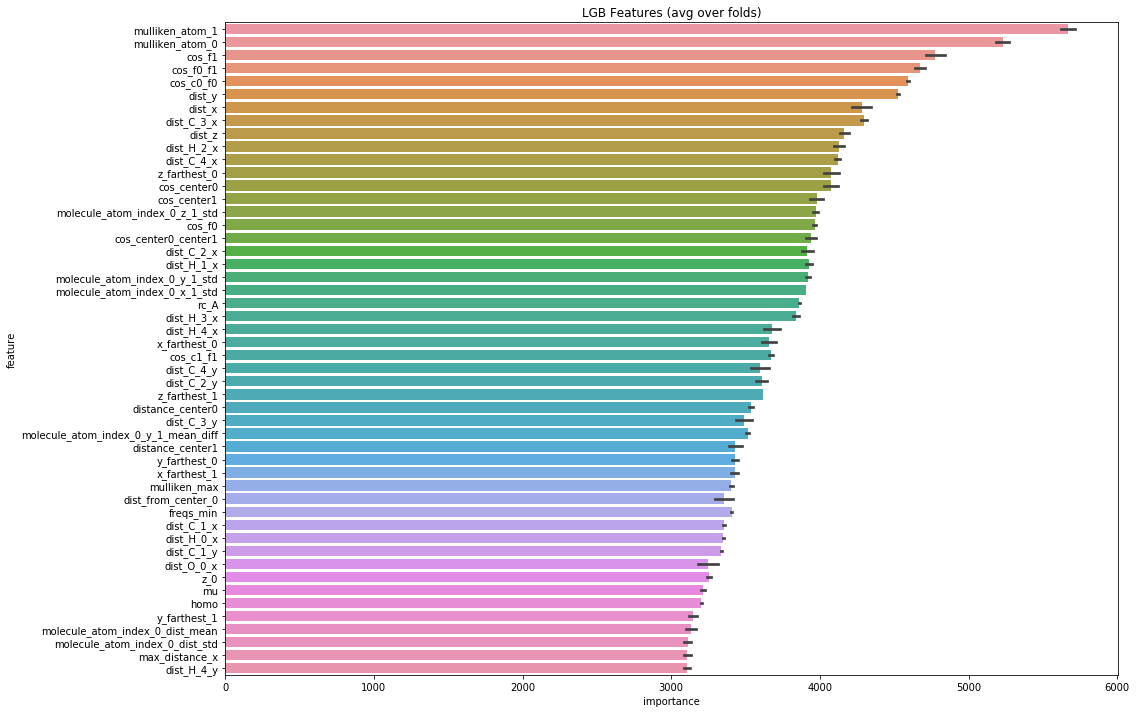

In [152]:
#Run
result_dict_lgb_oof = train_model_regression(X=x_train, 
                                             X_test=x_test, 
                                             y=y_train, 
                                             params=params, 
                                             folds=folds,
                                             model_type='lgb',
                                             eval_metric='group_mae',
                                             plot_feature_importance=True,
                                             verbose=1000, 
                                             early_stopping_rounds=200, 
                                             n_estimators=5000)